## Loading libraries

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import pickle
import numpy as np
from scipy.misc import imread, imsave
from pathlib import Path

import matplotlib.pyplot as plt
%matplotlib inline

from src.enhancer import ImageComparator
from src.enhancer.enhancers import ENHANCERS

## Setting up paths

In [16]:
base_path = Path('test-2')
originals_path = base_path / 'original'
masks_path = base_path / 'mask'
weight_maps_path = base_path / 'weight-map'

## Loading z-values and image/segmentation

In [22]:
keyword = 'flickr-tulip'
zfile = 'z-values/tulip.pkl'
zfile_l = 'z-values/tulip-local.pkl'

zcollection = pickle.load(open(zfile, 'rb'))
zcollection_l = pickle.load(open(zfile_l, 'rb'))

for key in zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist').descriptors:
    dir_path = base_path / key
    dir_path.mkdir(exist_ok=True, parents=True)


image = imread(originals_path / ('%s.jpg' % keyword))
seg_b = imread(masks_path / ('%s-mask.png' % keyword)).astype(np.bool)

(-0.5, 239.5, 160.5, -0.5)

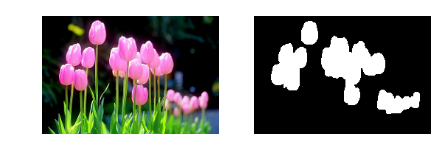

In [23]:
plt.rcParams['figure.figsize'] = 5, 5
plt.subplot(121)
plt.imshow(image)
plt.axis('off')

plt.subplot(122)
plt.imshow(seg_b, cmap='gray')
plt.axis('off')

In [24]:
from src.descriptors.descriptors import DESCRIPTORS
image_comparator = ImageComparator()

for key in zcollection.reject('lightness_layout', 'chroma_layout', 'hue_layout', 'details_hist',
                                              'frequency_hist').descriptors:
    # Global z, Global descriptor
    delta, _ = image_comparator.compare_descriptor(image, key, zcollection.descriptors[key])
    z_delta = zcollection.descriptors[key].descriptor * delta
    # Global enhancement
    result_g_g_g = ENHANCERS[key].enhance(image, z_delta, 1)
    imsave(base_path / key / ('%s-g-g-g.jpg' % keyword), result_g_g_g)
    # Local enhancement
    result_g_g_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
    imsave(base_path / key / ('%s-g-g-l.jpg' % keyword), result_g_g_l)
    
    
    # Global z, Local descriptor
    delta, _ = image_comparator.compare_descriptor(image, key, zcollection_l.descriptors[key], mask=seg_b)
    z_delta = zcollection_l.descriptors[key].descriptor * delta
    # Global enhancement
    result_g_l_g = ENHANCERS[key].enhance(image, z_delta, 1)
    imsave(base_path / key / ('%s-g-l-g.jpg' % keyword), result_g_l_g)
    # Local enhancement
    result_g_l_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
    imsave(base_path / key / ('%s-g-l-l.jpg' % keyword), result_g_l_l)
    
    
    # Local z, Global descriptor
    delta, _ = image_comparator.compare_descriptor(image, key, zcollection_l.descriptors[key])
    z_delta = zcollection_l.descriptors[key].descriptor * delta
    # Global enhancement
    result_l_g_g = ENHANCERS[key].enhance(image, z_delta, 1)
    imsave(base_path / key / ('%s-l-g-g.jpg' % keyword), result_l_g_g)
    # Local enhancement
    result_l_g_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
    imsave(base_path / key / ('%s-l-g-l.jpg' % keyword), result_l_g_l)
    
    
    # Local z, Local descriptor
    delta, _ = image_comparator.compare_descriptor(image, key, zcollection_l.descriptors[key], mask=seg_b)
    z_delta = zcollection_l.descriptors[key].descriptor * delta
    # Global enhancement
    result_l_g_g = ENHANCERS[key].enhance(image, z_delta, 1)
    imsave(base_path / key / ('%s-l-l-g.jpg' % keyword), result_l_g_g)
    # Local enhancement
    result_l_g_l = ENHANCERS[key].enhance(image, z_delta, 1, mask=seg_b)
    imsave(base_path / key / ('%s-l-l-l.jpg' % keyword), result_l_g_l)